In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim.models import Word2Vec
from gensim.models.doc2vec import TaggedDocument, Doc2Vec
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense,Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Input, Concatenate
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

2023-11-24 00:43:51.089876: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv('preprocessed_data_with_num.csv')

In [3]:
# replace NaN with empty strings
data.fillna('', inplace=True)

# combine all text
data['full_text'] = data['title'] + " " + data['location']  + " " + data['department']  + " " + data['company_profile']  + " " + data['description']  + " " + data['requirements']  + " "  + data['benefits'] + data['industry']  + " " + data['function']

<h1>Categorical and Numerical Models</h1>

In [4]:
from sklearn.ensemble import RandomForestClassifier ,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier ,ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,recall_score,precision_score,f1_score ,classification_report, r2_score ,confusion_matrix

In [5]:
x = data.drop(['fraudulent', 'in_balanced_dataset' ] , axis = 1)
y = data['fraudulent']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3 , random_state = 0)


In [6]:
train_set = x_train.copy()
train_set['fraudulent'] = y_train

<h3>Feature selection for models with categorical features & numerical features <h3>
here we used correlation plot, chi-square test and information gain to select features 

                                                   telecommuting  \
telecommuting                                           1.000000   
has_company_logo                                       -0.025834   
has_questions                                           0.013238   
employment_type                                        -0.021432   
required_experience                                    -0.020652   
required_education                                      0.019976   
title_length                                            0.007403   
location_length                                        -0.058558   
department_length                                       0.024188   
company_profile_length                                 -0.026061   
description_length                                     -0.008965   
requirements_length                                     0.006486   
missing_combination_Both profile and logo Missing       0.047479   
missing_combination_Both profile and logo Presen

<AxesSubplot:>

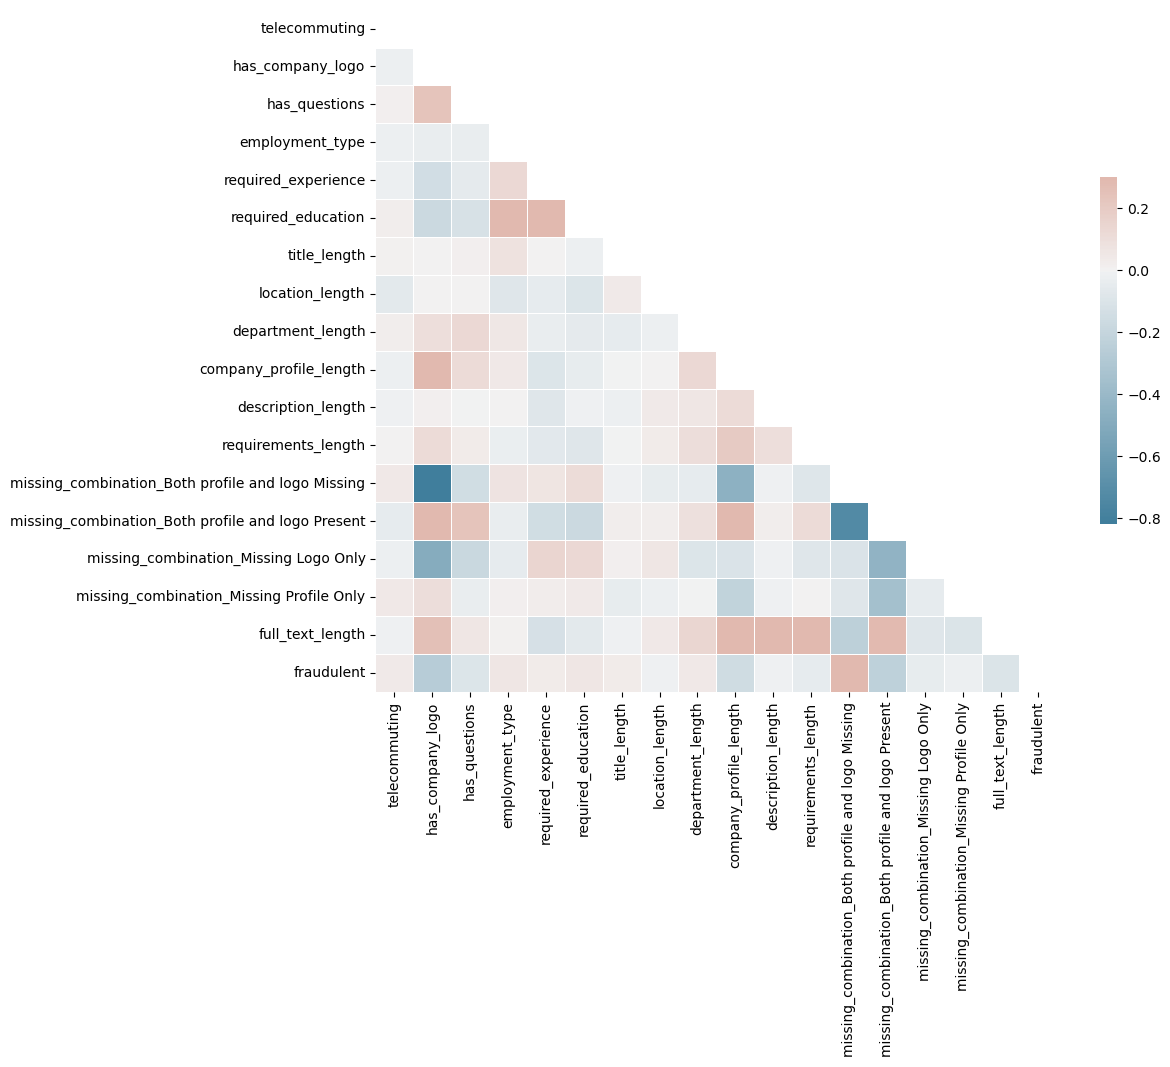

In [7]:
# method 1: correlation plot
corr = train_set.corr()
print(corr)
#Reduce to triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [8]:
corr['fraudulent']

telecommuting                                        0.038220
has_company_logo                                    -0.264762
has_questions                                       -0.093749
employment_type                                      0.056430
required_experience                                  0.035198
required_education                                   0.056368
title_length                                         0.036642
location_length                                     -0.008185
department_length                                    0.045707
company_profile_length                              -0.156713
description_length                                  -0.014166
requirements_length                                 -0.052014
missing_combination_Both profile and logo Missing    0.330414
missing_combination_Both profile and logo Present   -0.236670
missing_combination_Missing Logo Only               -0.043917
missing_combination_Missing Profile Only            -0.027242
full_tex

numerical feature 'location_length' has the smallest coefficient magnitude 

In [9]:
num_features = x_train.loc[:, ['telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 
       'missing_combination_Both profile and logo Missing', 'missing_combination_Both profile and logo Present', 'missing_combination_Missing Logo Only', 
       'missing_combination_Missing Profile Only', 'full_text_length', 'title_length', 'location_length', 'department_length', 
       'company_profile_length', 'description_length', 'requirements_length']]
target = y_train


(array([1.72780380e+01, 1.77069532e+02, 5.52814962e+01, 1.66014012e+01,
       1.74696864e+01, 8.96131602e+01, 1.14970815e+03, 1.68262315e+02,
       2.24440207e+01, 8.80830718e+00, 8.64555091e+04, 1.12091707e+02,
       1.56348224e+00, 2.76263737e+02, 1.55675499e+05, 1.54021451e+03,
       2.09453685e+04]), array([3.22897392e-005, 2.11489491e-040, 1.04447209e-013, 4.61169386e-005,
       2.91925499e-005, 2.89591387e-021, 5.19179282e-252, 1.77298617e-038,
       2.16357963e-006, 2.99862116e-003, 0.00000000e+000, 3.41158986e-026,
       2.11156081e-001, 4.89566719e-062, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000]))
location_length                                       2.111561e-01
missing_combination_Missing Profile Only              2.998621e-03
employment_type                                       4.611694e-05
telecommuting                                         3.228974e-05
required_experience                                   2.919255e-05
missing_combination_Missing L

<AxesSubplot:>

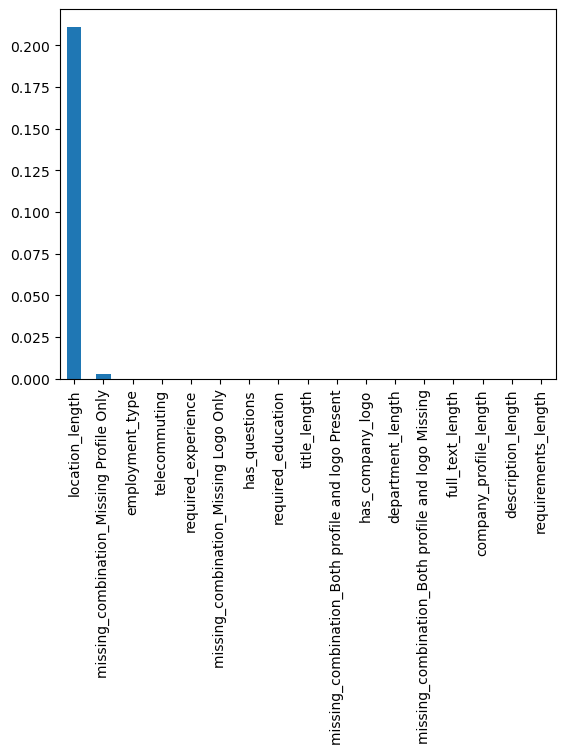

In [10]:
# Feature Selections
# Method 2. Chi-square

from sklearn.feature_selection import chi2
chi_scores = chi2(np.clip(num_features,0,10000000),target) # clip is to ensure no negative values
print(chi_scores)

p_values = pd.Series(chi_scores[1],index = num_features.columns)
p_values.sort_values(ascending = False , inplace = True)

print(p_values)
p_values.plot.bar()


From  the chi-square test, feature 'location_length' has p-value of 0.200, which is greater than 0.05. Therefore we don't have sufficient evidence to reject H0, that the feature is independent from the target variable 'fraudulent'. 

Therefore, we would consider dropping this feature from our model.

telecommuting                                        0.000000
has_company_logo                                     0.031081
has_questions                                        0.006214
employment_type                                      0.001850
required_experience                                  0.005292
required_education                                   0.009460
missing_combination_Both profile and logo Missing    0.033964
missing_combination_Both profile and logo Present    0.027396
missing_combination_Missing Logo Only                0.001301
missing_combination_Missing Profile Only             0.000648
full_text_length                                     0.026347
title_length                                         0.004683
location_length                                      0.006060
department_length                                    0.007323
company_profile_length                               0.082372
description_length                                   0.039268
requirem

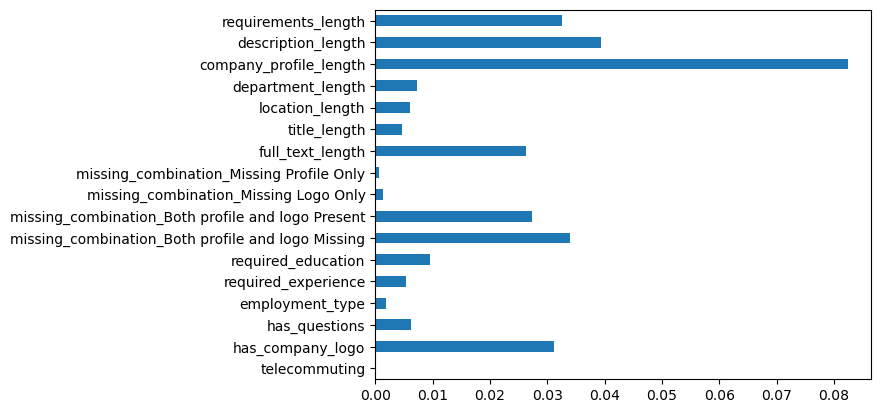

In [11]:
# 4. Feature Selections
# Method 3. Mutual Info Classifier. Estimates mutual information among the features and look at the information gain by each of the variables.
from sklearn.feature_selection import mutual_info_classif
IG = mutual_info_classif(num_features, target,random_state=42)
feature_IG = pd.Series(IG, num_features.columns)
feature_IG.plot(kind = 'barh')
feature_IG

From information gain, we can see that 'telecommuting' has no information gain (with value of 0). Therefore, we drop telecommuting as a result. 

<b> Therefore, we decided to remove features 'telecommuting' and 'location_length' as the prior does not provide much information gain and the later, based on the chi-sqaure test, it shows independency with the target variable. In addition, our one-hot encoded column combines information from 'has_company_logo' with the presence of 'company_profile' value (the value is not null). Thus, we will not include 'has_company_logo' for our models in this section.<b>

In [12]:
x_train_selected = x_train.loc[:, [ 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'missing_combination_Both profile and logo Missing', 'missing_combination_Both profile and logo Present',
       'missing_combination_Missing Logo Only', 'missing_combination_Missing Profile Only',
       'title_length', 'department_length',
       'company_profile_length', 'description_length', 'requirements_length']]

x_test_selected = x_test.loc[:, [ 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'missing_combination_Both profile and logo Missing', 'missing_combination_Both profile and logo Present',
       'missing_combination_Missing Logo Only', 'missing_combination_Missing Profile Only',
       'title_length', 'department_length',
       'company_profile_length', 'description_length', 'requirements_length']]

Logistic regression model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


classification_report = pd.DataFrame(columns=['Accuracy','F1_score','Precision','Recall'])

model = LogisticRegression(max_iter= 1500)
#max_iter is set as the model fails to converge when the number is too low. 
model = model.fit(x_train_selected , y_train)
for i in range(2) :
    if i == 0 :
        to_pred = x_train_selected
        pred = y_train
        title = 'Train'
        
    else :
        to_pred = x_test_selected
        pred = y_test
        title = 'Test'
    # Assuming 'model' is your trained logistic regression model
    threshold = 0.10  # Adjust the threshold as needed
    y_pred = (model.predict_proba(to_pred)[:, 1] > threshold).astype(int)

    # y_pred = model.predict(to_pred)

    acc = accuracy_score(pred , y_pred)
    f1 = f1_score(pred , y_pred)
    prec = precision_score(pred , y_pred)
    recall = recall_score(pred , y_pred)
    d = pd.DataFrame(data=np.array([acc,f1,prec,recall]).reshape(1,4) 
                    , columns=['Accuracy' , 'F1_score' , 'Precision' , 'Recall'])  
    classification_report = pd.concat([classification_report , d])
    classification_report.rename( index= { 0 :'{} _ {} Details'.format(model , title) } ,inplace=True )

classification_report

,Accuracy,F1_score,Precision,Recall
LogisticRegression(max_iter=1500) _ Train Details,0.874382,0.336896,0.225272,0.667797
LogisticRegression(max_iter=1500) _ Test Details,0.869237,0.329457,0.222513,0.634328


SVM

In [14]:

classification_report = pd.DataFrame(columns=['Accuracy','F1_score','Precision','Recall'])

model = SVC(probability= True)
model = model.fit(x_train_selected , y_train)
for i in range(2) :
    if i == 0 :
        to_pred = x_train_selected
        pred = y_train
        title = 'Train'
        
    else :
        to_pred = x_test_selected
        pred = y_test
        title = 'Test'
    threshold = 0.10  # Adjust the threshold as needed
    y_pred = (model.predict_proba(to_pred)[:, 1] > threshold).astype(int)

    acc = accuracy_score(pred , y_pred)
    f1 = f1_score(pred , y_pred)
    prec = precision_score(pred , y_pred)
    recall = recall_score(pred , y_pred)
    d = pd.DataFrame(data=np.array([acc,f1,prec,recall]).reshape(1,4) 
                    , columns=['Accuracy' , 'F1_score' , 'Precision' , 'Recall'])  
    classification_report = pd.concat([classification_report , d])
    classification_report.rename( index= { 0 :'{} _ {} Details'.format(model , title) } ,inplace=True )

classification_report

,Accuracy,F1_score,Precision,Recall
SVC(probability=True) _ Train Details,0.952539,0.013468,1.000000,0.006780
SVC(probability=True) _ Test Details,0.949169,0.007380,0.333333,0.003731


the model has a relatively poor performance, possibly due to that fact that the data is not linearly separable enough.

decision tree

In [15]:
classification_report = pd.DataFrame(columns=['Accuracy','F1_score','Precision','Recall'])

model = DecisionTreeClassifier()
model = model.fit(x_train_selected , y_train)
for i in range(2) :
    if i == 0 :
        to_pred = x_train_selected
        pred = y_train
        title = 'Train'
        
    else :
        to_pred = x_test_selected
        pred = y_test
        title = 'Test'
    threshold = 0.10  # Adjust the threshold as needed
    y_pred = (model.predict_proba(to_pred)[:, 1] > threshold).astype(int)


    acc = accuracy_score(pred , y_pred)
    f1 = f1_score(pred , y_pred)
    prec = precision_score(pred , y_pred)
    recall = recall_score(pred , y_pred)
    d = pd.DataFrame(data=np.array([acc,f1,prec,recall]).reshape(1,4) 
                    , columns=['Accuracy' , 'F1_score' , 'Precision' , 'Recall'])  
    classification_report = pd.concat([classification_report , d])
    classification_report.rename( index= { 0 :'{} _ {} Details'.format(model , title) } ,inplace=True )

classification_report

,Accuracy,F1_score,Precision,Recall
DecisionTreeClassifier() _ Train Details,1.000000,1.000000,1.00000,1.000000
DecisionTreeClassifier() _ Test Details,0.957672,0.588235,0.57971,0.597015


random forest

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


classification_report = pd.DataFrame(columns=['Accuracy','F1_score','Precision','Recall'])

model = RandomForestClassifier()
model = model.fit(x_train_selected , y_train)
for i in range(2) :
    if i == 0 :
        to_pred = x_train_selected
        pred = y_train
        title = 'Train'
        
    else :
        to_pred = x_test_selected
        pred = y_test
        title = 'Test'
    
    threshold = 0.10  # Adjust the threshold as needed
    y_pred = (model.predict_proba(to_pred)[:, 1] > threshold).astype(int)

    acc = accuracy_score(pred , y_pred)
    f1 = f1_score(pred , y_pred)
    prec = precision_score(pred , y_pred)
    recall = recall_score(pred , y_pred)
    d = pd.DataFrame(data=np.array([acc,f1,prec,recall]).reshape(1,4) 
                    , columns=['Accuracy' , 'F1_score' , 'Precision' , 'Recall'])  
    classification_report = pd.concat([classification_report , d])
    classification_report.rename( index= { 0 :'{} _ {} Details'.format(model , title) } ,inplace=True )

classification_report

,Accuracy,F1_score,Precision,Recall
RandomForestClassifier() _ Train Details,0.980886,0.833333,0.714286,1.00000
RandomForestClassifier() _ Test Details,0.924603,0.544000,0.392092,0.88806


XGBoost

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


classification_report = pd.DataFrame(columns=['Accuracy','F1_score','Precision','Recall'])

model = XGBClassifier()
model = model.fit(x_train_selected , y_train)
for i in range(2) :
    if i == 0 :
        to_pred = x_train_selected
        pred = y_train
        title = 'Train'
        
    else :
        to_pred = x_test_selected
        pred = y_test
        title = 'Test'
    
    threshold = 0.10  # Adjust the threshold as needed
    y_pred = (model.predict_proba(to_pred)[:, 1] > threshold).astype(int)

    acc = accuracy_score(pred , y_pred)
    f1 = f1_score(pred , y_pred)
    prec = precision_score(pred , y_pred)
    recall = recall_score(pred , y_pred)
    d = pd.DataFrame(data=np.array([acc,f1,prec,recall]).reshape(1,4) 
                    , columns=['Accuracy' , 'F1_score' , 'Precision' , 'Recall'])  
    classification_report = pd.concat([classification_report , d])
    classification_report.rename( index= { 0 :'{} _ {} Details'.format(model , title) } ,inplace=True )

classification_report

,Accuracy,F1_score,Precision,Recall
"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, random_state=None, ...) _ Train Details",0.978213,0.814355,0.686845,1.000000
"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, random_state=None, ...) _ Test Details",0.951814,0.623338,0.515892,0.787313


|  | Logistic Regression | SVM | Decision Tree | Random Forest | XGBoost | Average |
|----------|----------|----------|----------|----------|----------|----------|
| test result | 0.329 | 0.00735 | 0.609 | 0.548 | 0.623 | 0.423 |


<h1>Text Only Models</h1>

In [18]:
X_train_full, X_test_full,y_train , y_test = train_test_split(data.drop('fraudulent', axis=1), data["fraudulent"], test_size=0.3, random_state=0)
X_train = X_train_full[['full_text', 'has_questions', 'has_company_logo', 'employment_type', 'required_experience', 'required_education']]
X_test = X_test_full[['full_text', 'has_questions', 'has_company_logo', 'employment_type', 'required_experience', 'required_education']]

TFIDF Vectorizer

In [19]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['full_text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['full_text'])

In [22]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate F1 score
    f1 = f1_score(y_test, y_pred)
    
    return f1

logreg_model = LogisticRegression(max_iter= 1500)
logreg_f1 = train_and_evaluate_model(logreg_model, X_train_tfidf, y_train, X_test_tfidf, y_test)
print(f"Logistic Regression F1 Score: {logreg_f1}")

svm_model = SVC()
svm_f1 = train_and_evaluate_model(svm_model, X_train_tfidf, y_train, X_test_tfidf, y_test)
print(f"SVM F1 Score: {svm_f1}")

dt_model = DecisionTreeClassifier()
dt_f1 = train_and_evaluate_model(dt_model, X_train_tfidf, y_train, X_test_tfidf, y_test)
print(f"Decision Tree F1 Score: {dt_f1}")

rf_model = RandomForestClassifier()
rf_f1 = train_and_evaluate_model(rf_model, X_train_tfidf, y_train, X_test_tfidf, y_test)
print(f"Random Forest F1 Score: {rf_f1}")

xgb_model = XGBClassifier()
xgb_f1 = train_and_evaluate_model(xgb_model, X_train_tfidf, y_train, X_test_tfidf, y_test)
print(f"XGBoost F1 Score: {xgb_f1}")

print(f"average Score: {np.mean([logreg_f1, svm_f1, dt_f1, rf_f1, xgb_f1])}")

Logistic Regression F1 Score: 0.552278820375335
SVM F1 Score: 0.7129186602870813
Decision Tree F1 Score: 0.7564356435643566
Random Forest F1 Score: 0.7488372093023256
XGBoost F1 Score: 0.7849223946784921
average Score: 0.7110785456415181


Word2Vec

In [23]:
# Tokenize the text
tokenized_text = X_train['full_text'].apply(lambda x: x.split())

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Convert words to vectors
def get_vector(word_list, model):
    valid_words = [word for word in word_list if word in model.wv]
    if not valid_words:
        # If no valid words, return a vector of zeros or handle as needed
        return np.zeros(model.vector_size)
    return np.mean([model.wv[word] for word in valid_words], axis=0)

X_train_word2vec = tokenized_text.apply(lambda x: get_vector(x, word2vec_model))
X_test_word2vec = X_test['full_text'].apply(lambda x: get_vector(x.split(), word2vec_model))

In [25]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train.to_list(), y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test.to_list())
    
    # Evaluate F1 score
    f1 = f1_score(y_test, y_pred)
    
    return f1

logreg_model = LogisticRegression(max_iter= 1500)
logreg_f1 = train_and_evaluate_model(logreg_model, X_train_word2vec, y_train, X_test_word2vec, y_test)
print(f"Logistic Regression F1 Score: {logreg_f1}")

svm_model = SVC()
svm_f1 = train_and_evaluate_model(svm_model, X_train_word2vec, y_train, X_test_word2vec, y_test)
print(f"SVM F1 Score: {svm_f1}")

dt_model = DecisionTreeClassifier()
dt_f1 = train_and_evaluate_model(dt_model, X_train_word2vec, y_train, X_test_word2vec, y_test)
print(f"Decision Tree F1 Score: {dt_f1}")

rf_model = RandomForestClassifier()
rf_f1 = train_and_evaluate_model(rf_model, X_train_word2vec, y_train, X_test_word2vec, y_test)
print(f"Random Forest F1 Score: {rf_f1}")

xgb_model = XGBClassifier()
xgb_f1 = train_and_evaluate_model(xgb_model, X_train_word2vec, y_train, X_test_word2vec, y_test)
print(f"XGBoost F1 Score: {xgb_f1}")

print(f"average Score: {np.mean([logreg_f1, svm_f1, dt_f1, rf_f1, xgb_f1])}")

Logistic Regression F1 Score: 0.325068870523416
SVM F1 Score: 0.45251396648044695
Decision Tree F1 Score: 0.5176908752327747
Random Forest F1 Score: 0.5257452574525745
XGBoost F1 Score: 0.6419753086419753
average Score: 0.4925988556662375


Ngrams Analysis

In [26]:
# split train into fraud and non-fraud
X_train_nonfraud = X_train.loc[y_train==0]
X_train_fraud = X_train.loc[y_train==1]

In [27]:
# define function to return ngrams sorted by frequency
def get_ngrams(ngram, corpus):
    vec = CountVectorizer(ngram_range=(ngram, ngram)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = {}
    for word, idx in vec.vocabulary_.items():
        words_freq[word] = sum_words[0, idx]
    words_freq = dict(sorted(words_freq.items(), key=lambda item: item[1], reverse=True))
    return words_freq

In [28]:
nonfraud_unigram = get_ngrams(1, X_train_nonfraud['full_text'])
fraud_unigram = get_ngrams(1, X_train_fraud['full_text'])
nonfraud_unigram_top5 = [(k,v) for k,v in nonfraud_unigram.items() if k not in fraud_unigram.keys()][:5]
fraud_unigram_top5 = [(k,v) for k,v in fraud_unigram.items() if k not in nonfraud_unigram.keys()][:5]

nonfraud_num_unigram, fraud_num_unigram = sum(nonfraud_unigram.values()), sum(fraud_unigram.values())
diff_unigram = [(k, nonfraud_unigram[k]*100/nonfraud_num_unigram, fraud_unigram[k]*100/fraud_num_unigram, 
                 abs((nonfraud_unigram[k]*100/nonfraud_num_unigram)-(fraud_unigram[k]*100/fraud_num_unigram))) for k in nonfraud_unigram.keys() if k in fraud_unigram.keys()]
diff_unigram = sorted(diff_unigram, key=lambda x: x[3], reverse=True)

print(nonfraud_unigram_top5)
print(fraud_unigram_top5)
print(diff_unigram[:5])

[('awesome', 1362), ('abroad', 1289), ('athens', 921), ('european', 865), ('berlin', 785)]
[('aker', 152), ('accion', 58), ('0fa3f7c5e23a16de16a841e368006cae916884407d90b154dfef3976483a71ae', 53), ('anyperk', 40), ('novation', 40)]
[('engineering', 0.16199194664859687, 0.4842268371145133, 0.32223489046591647), ('team', 0.8978269988982973, 0.5835986054267092, 0.31422839347158815), ('position', 0.26084672032725065, 0.5297020531217894, 0.26885533279453877), ('marketing', 0.32690296259294693, 0.10189816920148889, 0.22500479339145804), ('work', 0.884937176053005, 1.0998265204722686, 0.21488934441926355)]


In [29]:
nonfraud_bigram = get_ngrams(2, X_train_nonfraud['full_text'])
fraud_bigram = get_ngrams(2,  X_train_fraud['full_text'])
nonfraud_bigram_top5 = [(k,v) for k,v in nonfraud_bigram.items() if k not in fraud_bigram.keys()][:5]
fraud_bigram_top5 = [(k,v) for k,v in fraud_bigram.items() if k not in nonfraud_bigram.keys()][:5]

nonfraud_num_bigram, fraud_num_bigram = sum(nonfraud_bigram.values()), sum(fraud_bigram.values())
diff_bigram = [(k, nonfraud_bigram[k]*100/nonfraud_num_bigram, fraud_bigram[k]*100/fraud_num_bigram, 
                abs((nonfraud_bigram[k]*100/nonfraud_num_bigram)-(fraud_bigram[k]*100/fraud_num_bigram))) for k in nonfraud_bigram.keys() if k in fraud_bigram.keys()]
diff_bigram = sorted(diff_bigram, key=lambda x: x[3], reverse=True)

print(nonfraud_bigram_top5)
print(fraud_bigram_top5)
print(diff_bigram[:5])

[('university degree', 820), ('increase productivity', 783), ('document communication', 773), ('relevant job', 709), ('digital marketing', 617)]
[('aker solution', 148), ('aptitude staffing', 76), ('bring discovery', 53), ('production maximize', 53), ('maximize recovery', 53)]
[('data entry', 0.008330150535368569, 0.1887335387115339, 0.18040338817616533), ('oil gas', 0.011754402138840232, 0.12610447205389486, 0.11435006991505463), ('customer service', 0.15939232704236853, 0.2657503639256576, 0.10635803688328907), ('work home', 0.006914354199317784, 0.09648261620230882, 0.08956826200299103), ('gas industry', 0.005498557863267, 0.08717289007752463, 0.08167433221425763)]


In [30]:
nonfraud_trigram = get_ngrams(3,  X_train_nonfraud['full_text'])
fraud_trigram = get_ngrams(3,  X_train_fraud['full_text'])
nonfraud_trigram_top5 = [(k,v) for k,v in nonfraud_trigram.items() if k not in fraud_trigram.keys()][:5]
fraud_trigram_top5 = [(k,v) for k,v in fraud_trigram.items() if k not in nonfraud_trigram.keys()][:5]

nonfraud_num_trigram, fraud_num_trigram = sum(nonfraud_trigram.values()), sum(fraud_trigram.values())
diff_trigram = [(k, nonfraud_trigram[k]*100/nonfraud_num_trigram, fraud_trigram[k]*100/fraud_num_trigram, 
                 abs((nonfraud_trigram[k]*100/nonfraud_num_trigram)-(fraud_trigram[k]*100/fraud_num_trigram))) for k in nonfraud_trigram.keys() if k in fraud_trigram.keys()]
diff_trigram = sorted(diff_trigram, key=lambda x: x[3], reverse=True)

print(nonfraud_trigram_top5)
print(fraud_trigram_top5)
print(diff_trigram[:5])

[('full time permanent', 587), ('time permanent position', 563), ('permanent position many', 550), ('position many medium', 550), ('many medium large', 550)]
[('gas industry engineering', 55), ('28 000 people', 55), ('aker solution global', 53), ('solution global provider', 53), ('global provider product', 53)]
[('oil gas industry', 0.00551992577517772, 0.0876103635404794, 0.08209043776530167), ('usa tx houston', 0.0038341999396444043, 0.05103516322746372, 0.047200963287819316), ('product system service', 3.305344775555521e-05, 0.04508106085092629, 0.045048007403170734), ('approximately 28 000', 6.610689551111042e-05, 0.04508106085092629, 0.045014953955415174), ('service oil gas', 0.0003635879253111073, 0.04508106085092629, 0.04471747292561518)]


CountVectorizer - Unigram

In [31]:
count_vectorizer = CountVectorizer()
X_train_cv = count_vectorizer.fit_transform(X_train['full_text'])
X_test_cv = count_vectorizer.transform(X_test['full_text'])

In [32]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate F1 score
    f1 = f1_score(y_test, y_pred)
    
    return f1

logreg_model = LogisticRegression(max_iter= 1500)
logreg_f1 = train_and_evaluate_model(logreg_model, X_train_cv, y_train, X_test_cv, y_test)
print(f"Logistic Regression F1 Score: {logreg_f1}")

svm_model = SVC()
svm_f1 = train_and_evaluate_model(svm_model, X_train_cv, y_train, X_test_cv, y_test)
print(f"SVM F1 Score: {svm_f1}")

dt_model = DecisionTreeClassifier()
dt_f1 = train_and_evaluate_model(dt_model, X_train_cv, y_train, X_test_cv, y_test)
print(f"Decision Tree F1 Score: {dt_f1}")

rf_model = RandomForestClassifier()
rf_f1 = train_and_evaluate_model(rf_model, X_train_cv, y_train, X_test_cv, y_test)
print(f"Random Forest F1 Score: {rf_f1}")

xgb_model = XGBClassifier()
xgb_f1 = train_and_evaluate_model(xgb_model, X_train_cv, y_train, X_test_cv, y_test)
print(f"XGBoost F1 Score: {xgb_f1}")

print(f"average Score: {np.mean([logreg_f1, svm_f1, dt_f1, rf_f1, xgb_f1])}")

Logistic Regression F1 Score: 0.7975206611570248
SVM F1 Score: 0.6157760814249365
Decision Tree F1 Score: 0.7927565392354126
Random Forest F1 Score: 0.7353629976580797
XGBoost F1 Score: 0.810344827586207
average Score: 0.750352221412332


CountVectorizer - Bigram

In [33]:
count_vectorizer = CountVectorizer(ngram_range=(2,2))
X_train_bicv = count_vectorizer.fit_transform(X_train['full_text'])
X_test_bicv = count_vectorizer.transform(X_test['full_text'])

In [35]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate F1 score
    f1 = f1_score(y_test, y_pred)
    
    return f1

logreg_model = LogisticRegression()
logreg_f1 = train_and_evaluate_model(logreg_model, X_train_bicv, y_train, X_test_bicv, y_test)
print(f"Logistic Regression F1 Score: {logreg_f1}")

svm_model = SVC()
svm_f1 = train_and_evaluate_model(svm_model, X_train_bicv, y_train, X_test_bicv, y_test)
print(f"SVM F1 Score: {svm_f1}")

dt_model = DecisionTreeClassifier()
dt_f1 = train_and_evaluate_model(dt_model, X_train_bicv, y_train, X_test_bicv, y_test)
print(f"Decision Tree F1 Score: {dt_f1}")

rf_model = RandomForestClassifier()
rf_f1 = train_and_evaluate_model(rf_model, X_train_bicv, y_train, X_test_bicv, y_test)
print(f"Random Forest F1 Score: {rf_f1}")

xgb_model = XGBClassifier()
xgb_f1 = train_and_evaluate_model(xgb_model, X_train_bicv, y_train, X_test_bicv, y_test)
print(f"XGBoost F1 Score: {xgb_f1}")

print(f"average Score: {np.mean([logreg_f1, svm_f1, dt_f1, rf_f1, xgb_f1])}")

Logistic Regression F1 Score: 0.7937915742793792
SVM F1 Score: 0.671604938271605
Decision Tree F1 Score: 0.8114754098360656
Random Forest F1 Score: 0.7709750566893424
XGBoost F1 Score: 0.8008752735229759
average Score: 0.7697444505198736


<h3>Using text features only</h3>




| | Logistic Regression | SVM | Decision Tree | Random Forest | XGBoost | Average |
|----------|----------|----------|----------|----------|----------|----------|
| TFIDF | 0.552 | 0.713 | 0.756 | 0.749 | 0.785 | 0.711 |
| Word2Vec | 0.325 | 0.453 | 0.518 | 0.526 | 0.642 | 0.493 |
| CountVectorizer - Unigram | 0.798 | 0.616 | 0.793 | 0.735 | 0.810 | 0.750 |
| CountVectorizer - Bigram | 0.794 | 0.672 | 0.811 | 0.771 | 0.801 | 0.770 |

Based on the results above, the best word embedding method to use is CountVectorizer - Bigram that obtained the highest average F1 score of 0.761 across all models. Hence, we will be using CountVectorizer - Bigram moving forward.

 Long Short Term Memory (LSTM)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense,Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.text import one_hot

In [44]:
voc_size=10000
corpus = data["full_text"]
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
# onehot_repr[1]
sent_length=50
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
# print(embedded_docs)
embedding_vector_features=50
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Bidirectional(LSTM(100))) 
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(embedded_docs, data["fraudulent"], test_size=0.3, random_state=0)
model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 50)            500000    
                                                                 
 bidirectional_2 (Bidirecti  (None, 200)               120800    
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 621001 (2.37 MB)
Trainable params: 621001 (2.37 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
386/386 [==============================] - 29s 62ms/step - loss: 0.1

In [ ]:
# Evaluate the model on the test set
# loss, accuracy = model.evaluate(X_test_lstm, y_test_lstm)

# print(f"Test Accuracy: {accuracy}")
# print(f"Test Loss: {loss}")

In [ ]:
# from sklearn.metrics import classification_report
# Get classification report
# report = classification_report(y_test_lstm, y_pred.round(),target_names = ['0','1'])
# print("Classification Report:")
# print(report)

In [45]:
y_pred = model.predict(X_test_lstm)
y_pred_binary = (y_pred > 0.5).astype('int32')  
f1_test = f1_score(y_test_lstm, y_pred_binary )
print(f'LSTM F1 score: {f1_test}')

166/166 [==============================] - 3s 14ms/step
LSTM F1 score: 0.6593406593406593


<h1>Combined text and numeric</h1>

Bigram and numeric

In [39]:
numeric_features = X_train_full[['has_questions', 'has_company_logo', 'employment_type', 'required_experience', 'required_education']]
combined_features = hstack([
    StandardScaler().fit_transform(numeric_features),
    X_train_bicv])
X_test_numeric_features = X_test_full[['has_questions', 'has_company_logo', 'employment_type', 'required_experience', 'required_education']]
X_test_combined_features = hstack([
    StandardScaler().fit_transform(X_test_numeric_features),
    X_test_bicv])

In [40]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate F1 score
    f1 = f1_score(y_test, y_pred)
    
    return f1
    
logreg_model = LogisticRegression()
logreg_f1 = train_and_evaluate_model(logreg_model, combined_features, y_train, X_test_combined_features, y_test)
print(f"Logistic Regression F1 Score: {logreg_f1}")

svm_model = SVC()
svm_f1 = train_and_evaluate_model(svm_model, combined_features, y_train, X_test_combined_features, y_test)
print(f"SVM F1 Score: {svm_f1}")

dt_model = DecisionTreeClassifier()
dt_f1 = train_and_evaluate_model(dt_model, combined_features, y_train, X_test_combined_features, y_test)
print(f"Decision Tree F1 Score: {dt_f1}")

rf_model = RandomForestClassifier()
rf_f1 = train_and_evaluate_model(rf_model, combined_features, y_train, X_test_combined_features, y_test)
print(f"Random Forest F1 Score: {rf_f1}")

xgb_model = XGBClassifier()
xgb_f1 = train_and_evaluate_model(xgb_model, combined_features, y_train, X_test_combined_features, y_test)
print(f"XGBoost F1 Score: {xgb_f1}")

Logistic Regression F1 Score: 0.8026315789473685
SVM F1 Score: 0.6941747572815535
Decision Tree F1 Score: 0.8346153846153846
Random Forest F1 Score: 0.7720090293453724
XGBoost F1 Score: 0.8197424892703862


LSTM

In [41]:
# from tensorflow.keras.layers import Input, Concatenate
# from tensorflow.keras.models import Model
# from sklearn.preprocessing import LabelEncoder

numerical_data = data[['has_questions', 'has_company_logo', 'employment_type', 'required_experience', 'required_education']].values

# Define text input
text_input = Input(shape=(sent_length,))
embedding_vector_features = 50
text_embedding = Embedding(voc_size, embedding_vector_features, input_length=sent_length)(text_input)
text_lstm = Bidirectional(LSTM(100))(text_embedding)
text_dropout = Dropout(0.3)(text_lstm)

# Define numerical input
numerical_input = Input(shape=(numerical_data.shape[1],))

# Concatenate text and numerical inputs
concatenated = Concatenate()([text_dropout, numerical_input])

# Dense layers for the merged inputs
dense_layer = Dense(64, activation='relu')(concatenated)
output_layer = Dense(1, activation='sigmoid')(dense_layer)

# Create and compile the model
model = Model(inputs=[text_input, numerical_input], outputs=output_layer)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#embedded_docs = np.array(embedded_docs)
#numerical_data = np.array(numerical_data)
labels = np.array(data["fraudulent"])

print(model.summary())

text_train, text_test, num_train, num_test, labels_train, labels_test = train_test_split(
    embedded_docs, numerical_data, labels, test_size=0.3, random_state=0
)

# Train the model using both text and numerical data
model.fit([text_train, num_train], labels_train, epochs=10, batch_size=32, validation_data=([text_test, num_test], labels_test))


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 50)]                 0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, 50, 50)               500000    ['input_1[0][0]']             
                                                                                                  
 bidirectional_1 (Bidirecti  (None, 200)                  120800    ['embedding_1[0][0]']         
 onal)                                                                                            
                                                                                                  
 dropout_1 (Dropout)         (None, 200)                  0         ['bidirectional_1[0][0]'] 

In [43]:
# Make predictions on the test data
test_predictions = model.predict([text_test, num_test])
y_pred_binary = (test_predictions > 0.5).astype('int32') 
f1_test = f1_score(y_test_lstm, y_pred_binary )
print(f'LSTM F1 score: {f1_test}')

166/166 [==============================] - 2s 13ms/step
LSTM F1 score: 0.6875


<h3>Combined features</h3>

|  | Logistic Regression | SVM | Decision Tree| Random Forest | XGBoost | LSTM |
|----------|----------|----------|----------|----------|----------|----------|
| Categorical and Numerical Only | 0.329 | 0.00735| 0.609 | 0.548 | 0.623 |  |
| Text Only | 0.794 | 0.672 | 0.811 | 0.771 | 0.801 | 0.659 |
| Text and Numeric | 0.803 | 0.694 | 0.835 | 0.772 | 0.820 | 0.688 |